In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import animation

In [2]:
t = np.arange(0, 100, 0.001)

def h(m1, m2, r=1):
    Mc = (m1*m2)**(3/5)/(m1+m2)**(1/5)
    t_c = (1/(40*np.pi))**(8/3)*5/256*(const.gravitational_constant*Mc*1.9891*10**30/const.c**3)**(-5/3)

    tau = t_c - t

    phi = -2*(5*const.gravitational_constant*Mc*1.9891*10**30/const.c**3)**(-5/8)*tau**(5/8)
    Mpc = 3.085678*10**22
    
    h_p = 1/(r*Mpc)*(const.gravitational_constant*Mc*1.9891*10**30/const.c**2)**(5/4)*(5/(const.c*tau))**(1/4)*np.cos(phi)

    #h_x = 1/(r*Mpc)*(const.gravitational_constant*Mc*1.9891*10**30/const.c**2)**(5/4)*(5/(const.c*tau))**(1/4)*np.sin(phi)
    return h_p


/home/jagoras/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == '__main__':
/home/jagoras/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


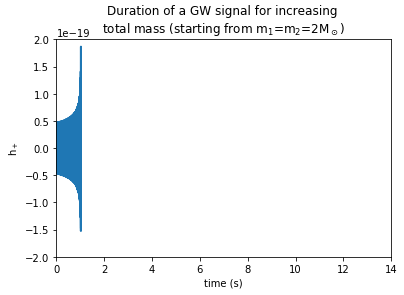

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 14), ylim=(-2e-19, 2e-19), label='x')
ax.set_title('Duration of a GW signal for increasing \ntotal mass (starting from m$_1$=m$_2$=2M$_\odot$)')
ax.set_xlabel('time (s)')
ax.set_ylabel('h$_+$')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.arange(0, 100, 0.001)
    y = h(2+(0.05*i),2+(0.05*i),1)
    #y = h(10,5,1+0.1*i)
    line.set_data(x, y)
    return line,

ani = animation.FuncAnimation(fig, animate,init_func=init, frames=150, interval=100, blit=True)
ani.save('GW_signal.mp4')
plt.show()